## Exoplanetas


* Planetas similares a la Tierra
* Planetas que están muy lejos
* Correlación de las características planetarias y 
* Comparación entre los distintos métodos de descubrimiento.

<img src=https://www.nationalgeographic.com.es/medio/2020/01/15/posible-nuevo-exoplaneta_6ca63dc9.jpg>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import matplotlib.cm as cm
from sklearn.linear_model import LinearRegression

# Los archivos de datos de entrada están disponibles en el directorio "../datos/".
inp = pd.read_csv('exoplanetas.csv')
inp['extra'] = 1

In [8]:
# Definición de algunas constantes
AvgHumanLifeExpectancy = 71 # https://en.wikipedia.org/wiki/List_of_countries_by_life_expectancy
ParsecInLightYears = 3.26 # Fuente : Google 1 parsec = 3.26 años / luz
EarthAgeGyr = 4.54 # https://en.wikipedia.org/wiki/Age_of_the_Earth (4.54 x 10**9)
EarthSurfaceTemp = 287 # Temperatura de la superfície de la Tierra en grados Kelvin

C:\Users\feeadmin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DiscoveryYear', ylabel='count'>

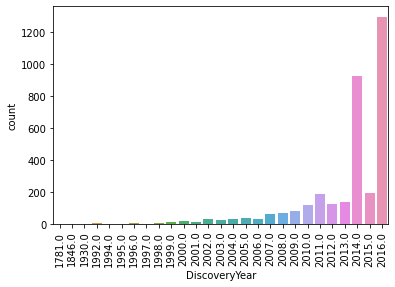

In [9]:
# Número de descubrimientos / año
plt.xticks(rotation=90)
sns.countplot(inp.DiscoveryYear)

* Podemos ver que la cifra ha subido rápidamente en los últimos años, aunque bajó en 2015. 
Veamos los datos correspondientes a 2015

In [24]:
d2015 = inp[inp.DiscoveryYear == 2015]
d2015.describe()

,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,InclinationDeg,SurfaceTempK,AgeGyr,DiscoveryYear,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,extra
count,192.000000,105.000000,134.000000,178.000000,158.000000,78.000000,39.000000,1.0,8.000000,99.000000,42.000000,0.0,192.0,145.000000,189.000000,174.000000,166.000000,177.000000,70.000000,192.0
mean,0.286458,1.786215,0.549237,351.222146,0.619484,0.142508,158.998113,172.0,120.757587,87.686719,1099.966667,NaN,2015.0,448.137892,0.922684,2.288403,-0.034422,5134.396610,5.637746,1.0
std,0.691174,2.396964,0.517563,1296.108520,1.489477,0.166293,150.176695,NaN,83.266877,7.483844,566.964143,NaN,0.0,1141.011531,0.405288,5.436731,0.282392,938.821649,4.017858,0.0
min,0.000000,0.002200,0.036726,0.381071,0.008800,0.000000,0.000000,172.0,-2.039300,50.410000,265.000000,NaN,2015.0,1.341700,0.031000,0.207000,-0.840000,2620.000000,0.002200,1.0
25%,0.000000,0.091560,0.170250,5.085350,0.055500,0.030000,51.050000,172.0,56.250000,87.205000,590.950000,NaN,2015.0,65.000000,0.729000,0.740000,-0.180000,4651.000000,2.150000,1.0
50%,0.000000,0.990000,0.246300,14.695445,0.107650,0.096500,144.000000,172.0,176.550000,88.320000,1001.500000,NaN,2015.0,200.000000,0.969000,0.970000,0.000000,5320.000000,4.630000,1.0
75%,0.000000,2.200000,0.937500,128.908107,0.400575,0.187500,226.000000,172.0,180.000000,89.450000,1609.000000,NaN,2015.0,343.000000,1.101000,1.496250,0.150000,5772.000000,9.475000,1.0
max,2.000000,13.900000,1.972000,15000.000000,14.000000,0.833000,791.000000,172.0,180.000000,138.000000,2358.000000,NaN,2015.0,8200.000000,2.500000,45.100000,0.480000,7500.000000,12.900000,1.0


### Planetas más jóvenes que la Tierra

La edad de la Tierra es de 4,54 mil millones de años (Fuente: Wikipedia)

In [11]:
inp[inp.AgeGyr < 4.54]
inp[inp.AgeGyr < 4.54][['AgeGyr', 'HostStarAgeGyr']]

,AgeGyr,HostStarAgeGyr
1605,0.0055,0.005


### Planetas como la tierra

Encontrar planetas cuya temperatura superficial sea similar a la de la tierra

In [25]:
f = ['PlanetIdentifier', 'DistFromSunParsec', 'PlanetaryMassJpt',\
    'RadiusJpt', 'PeriodDays', 'SemiMajorAxisAU', 'HostStarTempK', 'SurfaceTempK']
d = inp[pd.DataFrame.abs(inp.SurfaceTempK - EarthSurfaceTemp) < 15]
d[f].describe()

,DistFromSunParsec,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,HostStarTempK,SurfaceTempK
count,22.000000,19.000000,3.000000,22.000000,21.000000,22.000000,22.000000
mean,112.012273,3.428947,0.417254,399.506562,1.076495,5528.090909,287.263636
std,143.577070,5.313711,0.418550,284.665566,0.552465,502.663090,9.214975
min,11.150000,0.011000,0.155833,58.430000,0.260000,4017.000000,273.000000
25%,33.740000,0.425000,0.175881,245.813475,0.818100,5397.250000,278.725000
50%,53.550000,0.820000,0.195930,296.537750,0.921000,5650.500000,291.400000
75%,99.300000,2.245000,0.547965,486.225000,1.300000,5867.500000,293.275000
max,591.740000,17.400000,0.900000,1299.000000,2.770000,6250.000000,299.200000


Estos planetas tienen una temperatura superficial similar a la de la Tierra y parece que su media HostStarTempK, Period Days está más cerca de la nuestra. Ahora todo lo que necesitamos es una atmósfera y una forma de llegar a ellos (ya que están a una distancia media de casi 350 años luz)

### Planetas demasiado lejanos

Esta es una lista de planetas que están tan lejos que cualquier imagen del planeta que veamos durante nuestra vida sería el estado del planeta anterior a la tierra. 

La razón de esto es, el hecho de que la luz, la entidad que más rápido se mueve en el universo, tarda más de 71 años en llegar a nosotros desde ese planeta. Por lo tanto, la última información que obtengamos del planeta tendría 71 años o más cuando nos llegue.

Por supuesto, esto es suponiendo que la persona esté en la Tierra durante toda su vida y que no haya suficientes avances en la Ciencia.

In [13]:
inp[inp.DistFromSunParsec * ParsecInLightYears > AvgHumanLifeExpectancy]

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,...,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,extra
3,Kepler-9 b,0,0.2500,0.840,19.224180,0.1430,0.0626,NaN,NaN,NaN,...,15/12/03,19 02 17,+38 24 03,650.00,1.070,1.020,0.12,5777.0,NaN,1
4,Kepler-9 c,0,0.1700,0.820,39.031060,0.2290,0.0684,NaN,NaN,NaN,...,15/12/03,19 02 17,+38 24 03,650.00,1.070,1.020,0.12,5777.0,NaN,1
5,Kepler-9 d,0,0.0220,0.147,1.592851,0.0271,NaN,NaN,NaN,NaN,...,14/03/10,19 02 17,+38 24 03,650.00,1.070,1.020,0.12,5777.0,NaN,1
6,GJ 160.2 b,0,0.0321,NaN,5.235400,0.0530,0.0600,350.00,NaN,NaN,...,15/04/21,04 06 34.84136,-20 51 11.2391,43.25,0.690,NaN,NaN,4347.0,NaN,1
8,WASP-124 b,0,0.6000,1.240,3.372650,0.0449,NaN,NaN,NaN,NaN,...,16/02/04,22 10 51.43,-30 44 58.8,433.00,1.070,NaN,-0.02,6050.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,HAT-P-34 b,0,3.3280,1.197,5.452700,0.0677,0.4410,NaN,NaN,NaN,...,13/05/29,20 12 46.885,+18 06 17.42,257.00,1.392,1.535,0.22,6442.0,NaN,1
3421,eta Cet b,0,2.4600,NaN,407.300000,1.2700,0.1700,247.20,NaN,NaN,...,15/12/11,01 08 35.39148,-10 10 56.1570,37.99,1.700,14.300,0.12,4528.0,NaN,1
3422,eta Cet c,0,3.1600,NaN,744.300000,1.9300,0.0200,36.67,NaN,NaN,...,15/12/11,01 08 35.39148,-10 10 56.1570,37.99,1.700,14.300,0.12,4528.0,NaN,1
3423,HD 108874 b,0,1.3600,NaN,395.400000,1.0510,0.0700,NaN,NaN,NaN,...,10/12/29,12 30 26,+22 52 47,68.50,1.000,1.220,0.14,5407.0,NaN,1


### Analizar las características

Veamos la correlación entre algunas características numéricas de los exoplanetas

<AxesSubplot:>

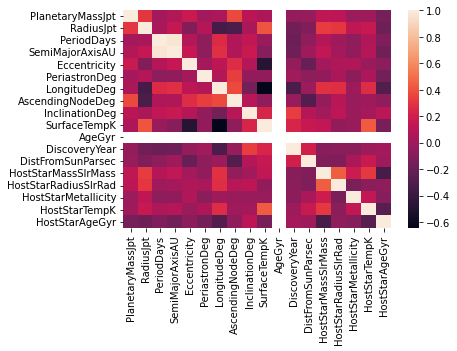

In [26]:
sns.heatmap(inp.select_dtypes([np.float64]).corr())

### ¿Qué método de descubrimiento es mejor?

Para ello, he consultado el artículo de Wikipedia que describe los métodos de descubrimiento. Encontré que algunos métodos son mejores para determinar algunas propiedades (como la masa, el radio, la excentricidad, etc.). Para esta sección, asumiré lo siguiente:

"En los datos, si la fracción de entradas no nulas para una propiedad es mayor para un método que para los demás, entonces este método es mejor para determinar esta propiedad" 

Vamos a poner a prueba esta hipótesis sobre la excentricidad. Wikipedia dice que el método RV (Velocidad Radial) es mejor para identificar la excentricidad.

C:\Users\feeadmin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DiscoveryMethod', ylabel='count'>

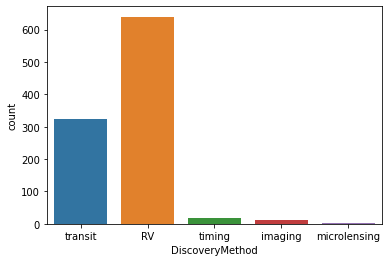

In [27]:
sns.countplot(inp[inp.Eccentricity.notnull()].DiscoveryMethod)

Parece que la hipótesis funcionó bien para la excentricidad

In [28]:
inp.columns

Index(['PlanetIdentifier', 'TypeFlag', 'PlanetaryMassJpt', 'RadiusJpt',
       'PeriodDays', 'SemiMajorAxisAU', 'Eccentricity', 'PeriastronDeg',
       'LongitudeDeg', 'AscendingNodeDeg', 'InclinationDeg', 'SurfaceTempK',
       'AgeGyr', 'DiscoveryMethod', 'DiscoveryYear', 'LastUpdated',
       'RightAscension', 'Declination', 'DistFromSunParsec',
       'HostStarMassSlrMass', 'HostStarRadiusSlrRad', 'HostStarMetallicity',
       'HostStarTempK', 'HostStarAgeGyr', 'extra', 'isPlanetaryMassJptNotNull',
       'isRadiusJptNotNull', 'isPeriodDaysNotNull', 'isSemiMajorAxisAUNotNull',
       'isEccentricityNotNull', 'isLongitudeDegNotNull',
       'isAscendingNodeDegNotNull', 'isInclinationDegNotNull',
       'isRightAscensionNotNull', 'isDeclinationNotNull',
       'isDistFromSunParsecNotNull', 'isAgeGyrNotNull'],
      dtype='object')

In [30]:
# Todas las características que nos interesan para comparar los métodos de descubrimiento
features = ['PlanetaryMassJpt', 'RadiusJpt', 'PeriodDays', 'SemiMajorAxisAU',\
           'Eccentricity','LongitudeDeg','AscendingNodeDeg', 'InclinationDeg',\
           'RightAscension', 'Declination', 'DistFromSunParsec', 'AgeGyr']

# Crear un colname para comprobar si la característica es nula o no
featuresbool = ['is'+feature+'NotNull' for feature in features]
for featurebool, feature in zip(featuresbool, features):
    inp[featurebool] = inp[feature].notnull()

In [31]:
d = inp.groupby('DiscoveryMethod').agg(np.mean)[featuresbool]

<AxesSubplot:>

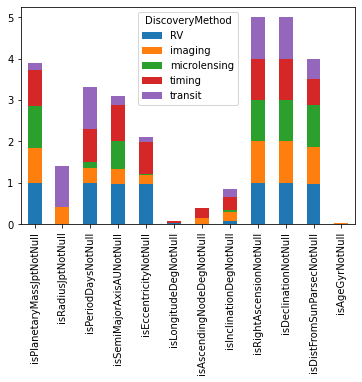

In [32]:
d.T.plot(kind='bar', stacked=True)

### Observaciones

* El tránsito es malo para identificar la masa planetaria pero bueno para identificar el radio.
* RV es bueno en la identificación de SemiMajorAxis, masa planetaria, período de días, excentricidad, pero malo en la identificación del radio.
* Todos ellos parecen ser buenos para determinar la Ascensión Recta, la Declinación y la Distancia al Sol. O bien estos atributos se calculan utilizando las propiedades previamente discutidas.
* El método Timing parece estar más cerca de RV en términos de identificación de propiedades. De hecho, a veces es mejor que RV.
* A pesar de que los otros métodos son mejores, el tránsito es el más utilizado según el gráfico de abajo. ¿Me pregunto por qué?

In [33]:
a = inp\
.groupby(['DiscoveryYear', 'DiscoveryMethod'])[['DiscoveryMethod']]\
.agg(['count'])

<AxesSubplot:xlabel='DiscoveryYear'>

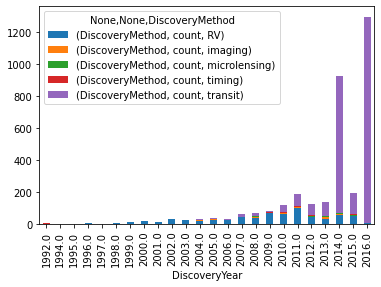

In [34]:
a.unstack().plot(kind='bar', stacked='True')

Now lets try to see which methods are good at what distances from Sun

In [35]:
d = inp.groupby('DiscoveryMethod')['DistFromSunParsec'].agg(['mean','min','max'])

<AxesSubplot:xlabel='DiscoveryMethod'>

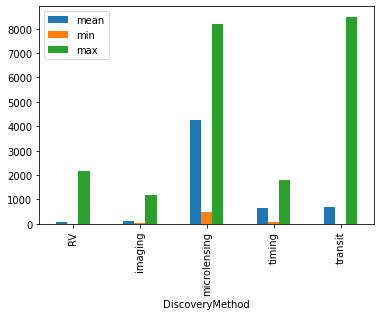

In [36]:
d.plot(kind='bar')

La microlente y el tránsito pueden detectar plantas hasta distancias muy lejanas, pero el tránsito puede detectar para un rango más amplio de distancias. Tal vez esto explique por qué el tránsito se utiliza con más frecuencia.

In [43]:
#read data 
planets = pd.read_csv('../datos/oec.csv')
planets.head()

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,...,DiscoveryYear,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr
0,KOI-1843.03,0,0.0014,0.054,0.176891,0.0048,NaN,NaN,NaN,NaN,...,2012.0,13/07/15,19 00 03.14,+40 13 14.7,NaN,0.46,0.45,0.00,3584.0,NaN
1,KOI-1843.01,0,NaN,0.114,4.194525,0.0390,NaN,NaN,NaN,NaN,...,NaN,NaN,19 00 03.14,+40 13 14.7,NaN,0.46,0.45,0.00,3584.0,NaN
2,KOI-1843.02,0,NaN,0.071,6.356006,0.0520,NaN,NaN,NaN,NaN,...,NaN,NaN,19 00 03.14,+40 13 14.7,NaN,0.46,0.45,0.00,3584.0,NaN
3,Kepler-9 b,0,0.2500,0.840,19.224180,0.1430,0.0626,NaN,NaN,NaN,...,2010.0,15/12/03,19 02 17,+38 24 03,650.0,1.07,1.02,0.12,5777.0,NaN
4,Kepler-9 c,0,0.1700,0.820,39.031060,0.2290,0.0684,NaN,NaN,NaN,...,2010.0,15/12/03,19 02 17,+38 24 03,650.0,1.07,1.02,0.12,5777.0,NaN


Text(-40, 40, 'el Sol')

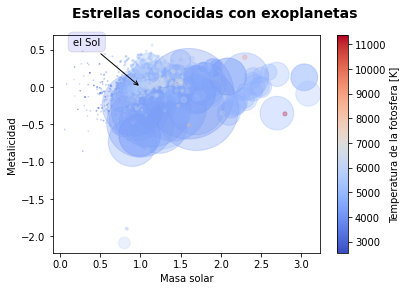

In [46]:
# Muestra la masa, el radio, la metalicidad y la temperatura de la estrella en forma de gráfico de dispersión
features = ['HostStarMassSlrMass','HostStarMetallicity','HostStarTempK', 'HostStarRadiusSlrRad']
stars_scatter = planets[features].dropna()
x = stars_scatter['HostStarMassSlrMass']
y = stars_scatter['HostStarMetallicity']
area = np.pi * stars_scatter['HostStarRadiusSlrRad']**2
colors = stars_scatter['HostStarTempK']

fig = plt.figure()
fig.suptitle('Estrellas conocidas con exoplanetas', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xlabel('Masa solar')
ax.set_ylabel('Metalicidad')

normalize = clr.Normalize(vmin=colors.min(), vmax=colors.max())
colormap = cm.coolwarm

#add colorbar showing temperature in K
scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(colors)
clb = plt.colorbar(scalarmappaple)
clb.set_label('Temperatura de la fotosfera [K]')


#mark the Sun on the plot
plt.scatter(x, y, s=area, c = normalize(colors), cmap = colormap, alpha=0.3)
plt.annotate('el Sol', xy = (1,0), 
             xytext = (-40, 40),
             textcoords = 'offset points', ha = 'right', va = 'bottom',
             bbox = dict(boxstyle = 'round,pad=0.5', fc = 'blue', alpha = 0.1),
             arrowprops = dict(arrowstyle = '->',connectionstyle = 'arc3,rad=0')
             )

### Estrellas similares al Sol

In [47]:
stars_slr = planets[(planets.HostStarMassSlrMass > 0.5)&(planets.HostStarMassSlrMass < 1.5)&(planets.HostStarRadiusSlrRad > 0.5)&(planets.HostStarRadiusSlrRad < 1.5)]
star_features = ['HostStarMassSlrMass','HostStarRadiusSlrRad','HostStarMetallicity','HostStarTempK','HostStarAgeGyr']
stars_slr[star_features].describe()

,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr
count,2502.000000,2502.000000,1798.000000,2476.000000,282.000000
mean,0.949289,0.969473,0.020563,5523.586066,5.019082
std,0.160777,0.220967,0.154860,541.739657,3.355210
min,0.514000,0.504000,-0.710000,3655.000000,0.011000
25%,0.849000,0.805000,-0.040000,5226.750000,2.310000
50%,0.960000,0.950000,0.020000,5632.000000,4.570000
75%,1.060000,1.120000,0.080000,5902.000000,7.000000
max,1.495000,1.497000,0.560000,7400.000000,13.900000


In [49]:
print("Número de estrellas similares al Sol: " + str(stars_slr.shape[0]))

Número de estrellas similares al Sol: 2502


Text(-50, 50, 'El Sol')

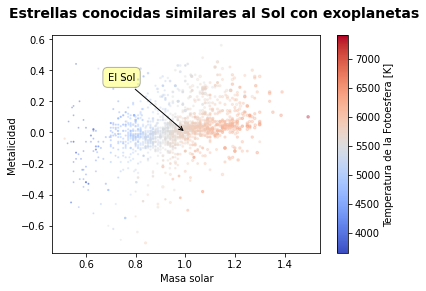

In [50]:
#vamos a echar un vistazo a nuestra nueva selección
stars_scatter_slr = stars_slr[features].dropna()
x = stars_scatter_slr['HostStarMassSlrMass']
y = stars_scatter_slr['HostStarMetallicity']
area = np.pi * stars_scatter_slr['HostStarRadiusSlrRad']**2
colors = stars_scatter_slr['HostStarTempK']

fig = plt.figure()
fig.suptitle('Estrellas conocidas similares al Sol con exoplanetas', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xlabel('Masa solar')
ax.set_ylabel('Metalicidad')

normalize = clr.Normalize(vmin=colors.min(), vmax=colors.max())
colormap = cm.coolwarm

#add colorbar showing temperature in K
scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(colors)
clb = plt.colorbar(scalarmappaple)
clb.set_label('Temperatura de la Fotoesfera [K]')


#mark the Sun on the plot
plt.scatter(x, y, s=area, c = normalize(colors), cmap = colormap, alpha=0.3)
plt.annotate('El Sol', xy = (1,0), 
             xytext = (-50, 50),
             textcoords = 'offset points', ha = 'right', va = 'bottom',
             bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.3),
             arrowprops = dict(arrowstyle = '->',connectionstyle = 'arc3,rad=0')
             )

### Planetas con posibilidad de albergar vida


Establezcamos unos criterios muy básicos para planetas habitables:

Masa mínima de Júpiter: 0,0015 (aproximadamente 1/3 de la masa de la Tierra)
Masa máxima de Júpiter: 0,03 (alrededor de 10 Tierras, límite superior propuesto para los planetas superterrestres)
Temperaturas superficiales mínimas y máximas aproximadamente equivalentes a las de la Tierra, con cierto margen (170 - 350 K)

In [51]:
planet_features = ['PlanetIdentifier','PlanetaryMassJpt','RadiusJpt','PeriodDays','SemiMajorAxisAU','SurfaceTempK','AgeGyr']
#splitting up the filtering for readability
earth_plt = planets[(planets.PlanetaryMassJpt > 0.0015)&(planets.PlanetaryMassJpt < 0.03)&(planets.SurfaceTempK > 170)&(planets.SurfaceTempK < 350)]

In [52]:
earth_plt

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,...,DiscoveryYear,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr
923,HD 40307 g,0,0.022334,NaN,197.80000,0.6000,0.290,NaN,NaN,NaN,...,2008.0,12/11/08,05 54 04,-60 01 24,12.80,0.77,NaN,-0.310,4977.0,NaN
1002,Gliese 163 c,0,0.021391,NaN,25.63058,0.1254,0.099,227.005878,24.522594,NaN,...,2012.0,16/02/03,04 09 15.66350,-53 22 23.3050,15.00,0.40,NaN,NaN,NaN,5.5
2634,Gliese 581 c,0,0.017301,NaN,12.91400,0.0721,NaN,NaN,NaN,NaN,...,2007.0,14/07/04,15 19 26,-07 43 20,6.21,0.31,0.3,-0.135,3498.0,NaN
2635,Gliese 581 d,0,0.019000,NaN,66.64000,0.2200,0.250,NaN,NaN,NaN,...,2007.0,14/07/04,15 19 26,-07 43 20,6.21,0.31,0.3,-0.135,3498.0,NaN
2638,Gliese 581 g,0,0.009752,NaN,36.50000,0.1460,0.000,NaN,NaN,NaN,...,2010.0,14/07/04,15 19 26,-07 43 20,6.21,0.31,0.3,-0.135,3498.0,NaN
3382,HD 85512 b,0,0.011000,NaN,58.43000,0.2600,0.110,NaN,NaN,NaN,...,2011.0,11/08/18,09 51 07,-43 30 10,11.15,0.69,NaN,-0.330,4715.0,NaN


Bueno, eso es todo. 6 planetas que cumplen nuestros requisitos básicos, de 3426. Otra cosa que podemos intentar es comprobar si un planeta se encuentra dentro de la zona habitable de su estrella, en lugar de filtrar simplemente por la temperatura de la superficie. Para ello, tenemos que calcular la luminosidad de la estrella.

Fuentes:

http://astro.unl.edu/naap/hr/hr_background2.html

http://www.planetarybiology.com/calculating_habitable_zone.html

In [53]:
planets_lum = pd.DataFrame.copy(planets)
#calculate star luminosity
planets_lum['Luminosity'] = planets_lum['HostStarRadiusSlrRad']**2  * (planets_lum['HostStarTempK']/5777)**4

#add habitable zone boundaries
planets_lum['HabZoneOut'] = np.sqrt(planets_lum['Luminosity']/0.53)
planets_lum['HabZoneIn'] = np.sqrt(planets_lum['Luminosity']/1.1)

In [54]:
planets_lum[['HostStarRadiusSlrRad','HostStarTempK','Luminosity','HabZoneOut','HabZoneIn']].head()

,HostStarRadiusSlrRad,HostStarTempK,Luminosity,HabZoneOut,HabZoneIn
0,0.45,3584.0,0.029998,0.237906,0.165138
1,0.45,3584.0,0.029998,0.237906,0.165138
2,0.45,3584.0,0.029998,0.237906,0.165138
3,1.02,5777.0,1.040400,1.401078,0.972532
4,1.02,5777.0,1.040400,1.401078,0.972532


In [55]:
earth_plt2 = planets_lum[(planets_lum.PlanetaryMassJpt > 0.0015)&(planets_lum.PlanetaryMassJpt < 0.03)&(planets_lum.SemiMajorAxisAU > planets_lum.HabZoneIn)&(planets_lum.SemiMajorAxisAU < planets_lum.HabZoneOut)]
earth_plt2[planet_features]

,PlanetIdentifier,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,SurfaceTempK,AgeGyr
216,Gliese 3293 c,0.027000,NaN,48.1400,0.19390,NaN,NaN
384,Earth,0.003146,0.09113,365.2422,1.00000,NaN,NaN
1071,Wolf 1061 c,0.013400,NaN,17.8670,0.08427,NaN,NaN
1838,Gliese 667 C f,0.008493,NaN,39.0260,0.15600,NaN,NaN
2638,Gliese 581 g,0.009752,NaN,36.5000,0.14600,230.9,NaN
